# Configuração

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# Importação dos dados
data_path = "../data/premier_completo_19_25.csv"

df_raw = pd.read_csv(data_path)
df_raw.head()

,Div,Season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
0,E0,19,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.15,9.59,18.05,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94
1,E0,19,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.68,6.53,1.26,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89
2,E0,19,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,2.04,3.57,3.90,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88
3,E0,19,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.71,3.31,2.81,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98
4,E0,19,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.21,3.37,2.39,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04


# Análise Exploratória 

### Consistência dos Dados

In [3]:
print(f"Shape: {df_raw.shape} \n{df_raw.shape[0]} Partidas\n")

# Consistência dos Dados
df_raw.info()

Shape: (2280, 53) 
2280 Partidas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 53 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       2280 non-null   object 
 1   Season    2280 non-null   int64  
 2   Date      2280 non-null   object 
 3   Time      2280 non-null   object 
 4   HomeTeam  2280 non-null   object 
 5   AwayTeam  2280 non-null   object 
 6   FTHG      2280 non-null   int64  
 7   FTAG      2280 non-null   int64  
 8   FTR       2280 non-null   object 
 9   HTHG      2280 non-null   int64  
 10  HTAG      2280 non-null   int64  
 11  HTR       2280 non-null   object 
 12  Referee   2280 non-null   object 
 13  HS        2280 non-null   int64  
 14  AS        2280 non-null   int64  
 15  HST       2280 non-null   int64  
 16  AST       2280 non-null   int64  
 17  HF        2280 non-null   int64  
 18  AF        2280 non-null   int64  
 19  HC        2280 non-null   int64  
 

In [4]:
# Colunas com dados Faltantes
df_raw.isna().sum().sort_values(ascending= False).head()

P<2.5       12
P>2.5       12
B365>2.5     1
B365<2.5     1
B365A        0
dtype: int64

In [5]:
# Contagem de Resultados de Vitória (Mandante (H), Visitante(A), Empate(D))
df_raw['FTR'].value_counts(dropna= False)

FTR
H    993
A    762
D    525
Name: count, dtype: int64

In [6]:
# Criação de Variáveis Derivadas 
dfv1 = df_raw.copy()

# Diferenca Gols (Mandante - Visitante)
dfv1['Goal_Diff_Home'] = dfv1['FTHG'] - dfv1['FTAG']

# Partida Mandante Ganhou
dfv1['Home_Win'] = (dfv1['FTR'] == 'H').astype(int)

# Coversão Odds -> probabilidade implícita de vitória
odds_cols = ['B365H','B365D','B365A', 'PSH', 'PSA', 'PSD']

dfv1[odds_cols] = dfv1[odds_cols].apply(pd.to_numeric, errors= 'coerce')

# Tratamento de zeros para conversão em probabilidade
for c in odds_cols:
    dfv1.loc[~np.isfinite(dfv1[c]) | (dfv1[c] <= 0), c] = np.nan

probs = 1.0 / dfv1[odds_cols]
sum_probs_365 = probs.iloc[:, 0:3].sum(axis= 1)
sum_probs_p = probs.iloc[:, 3:6].sum(axis= 1)

# Normalizando para probabilidades somarem 1 (corrigindo over)
probs_norm_365 = probs.iloc[:, 0:3].div(sum_probs_365, axis= 0)
probs_norm_p = probs.iloc[:, 3:6].div(sum_probs_p, axis= 0)
print(probs_norm_365)
print(probs_norm_p)
# print(type(probs_norm_365))
probs_norm = pd.concat([probs_norm_365, probs_norm_p], axis= 1)

dfv1[[f'{c}_prob' for c in odds_cols]] = probs
dfv1[[f'{c}_prob_norm' for c in odds_cols]] = probs_norm
dfv1.head()

         B365H     B365D     B365A
0     0.851789  0.097104  0.051107
1     0.078851  0.145570  0.775579
2     0.480000  0.260000  0.260000
3     0.360818  0.295420  0.343762
4     0.313588  0.289466  0.396947
5     0.491685  0.274765  0.233550
6     0.725890  0.179744  0.094366
7     0.428346  0.294488  0.277165
8     0.207629  0.249155  0.543216
9     0.447154  0.284553  0.268293
10    0.731870  0.172987  0.095143
11    0.413495  0.279718  0.306787
12    0.374095  0.293521  0.332384
13    0.551044  0.249420  0.199536
14    0.423077  0.288462  0.288462
15    0.145300  0.198832  0.655868
16    0.699767  0.181273  0.118960
17    0.370111  0.304446  0.325443
18    0.557621  0.252788  0.189591
19    0.288462  0.288462  0.423077
20    0.290681  0.269918  0.439401
21    0.219288  0.253204  0.527508
22    0.395683  0.287770  0.316547
23    0.713719  0.180809  0.105472
24    0.288462  0.288462  0.423077
25    0.460526  0.269737  0.269737
26    0.634483  0.206897  0.158621
27    0.062771  0.12

,Div,Season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Goal_Diff_Home,Home_Win,B365H_prob,B365D_prob,B365A_prob,PSH_prob,PSA_prob,PSD_prob,B365H_prob_norm,B365D_prob_norm,B365A_prob_norm,PSH_prob_norm,PSA_prob_norm,PSD_prob_norm
0,E0,19,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.15,9.59,18.05,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,3,1,0.877193,0.100000,0.052632,0.869565,0.055402,0.104275,0.851789,0.097104,0.051107,0.844860,0.053828,0.101313
1,E0,19,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.68,6.53,1.26,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,-5,0,0.083333,0.153846,0.819672,0.085616,0.793651,0.153139,0.078851,0.145570,0.775579,0.082929,0.768739,0.148332
2,E0,19,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,2.04,3.57,3.90,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,0,0,0.512821,0.277778,0.277778,0.490196,0.256410,0.280112,0.480000,0.260000,0.260000,0.477440,0.249738,0.272823
3,E0,19,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.71,3.31,2.81,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,3,1,0.381679,0.312500,0.363636,0.369004,0.355872,0.302115,0.360818,0.295420,0.343762,0.359306,0.346519,0.294175
4,E0,19,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.21,3.37,2.39,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,0,0,0.333333,0.307692,0.421941,0.311526,0.418410,0.296736,0.313588,0.289466,0.396947,0.303433,0.407540,0.289027


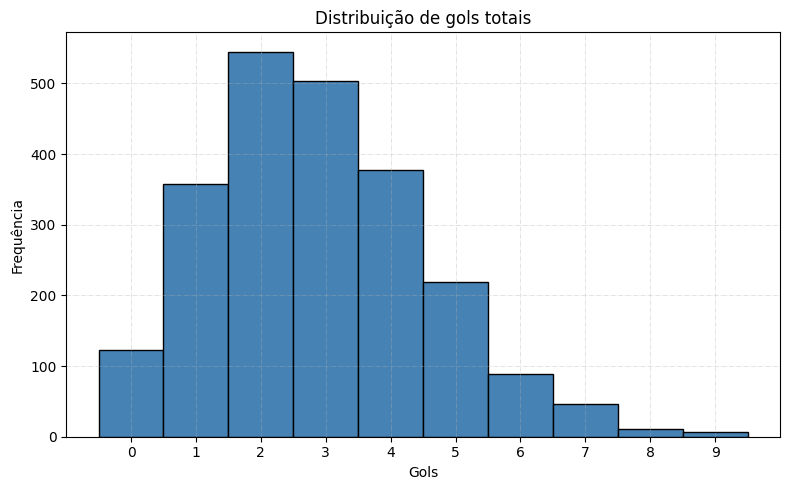

In [7]:
goals = dfv1['FTHG'] + dfv1['FTAG']

plt.figure(figsize=(8,5))
bins = np.arange(goals.min(), goals.max() + 2) - 0.5  
plt.hist(goals, bins=bins, edgecolor='black', color='steelblue')

plt.xticks(np.arange(int(goals.min()), int(goals.max()) + 1))

plt.grid(linewidth=0.5, linestyle='-.', alpha=0.5)
plt.title("Distribuição de gols totais")
plt.xlabel("Gols")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

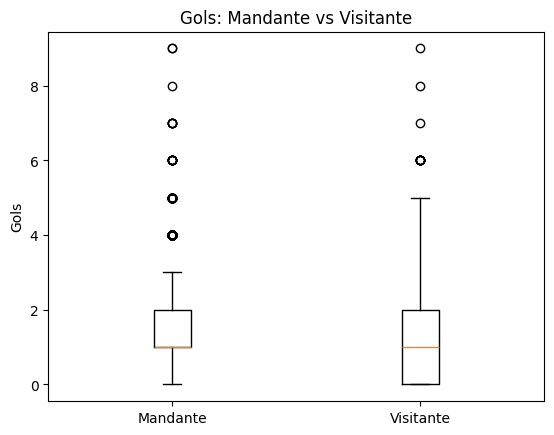

In [8]:
plt.boxplot([dfv1['FTHG'].dropna(), dfv1['FTAG'].dropna()], tick_labels= ['Mandante', 'Visitante'])
plt.title('Gols: Mandante vs Visitante')
plt.ylabel('Gols') 
plt.show()

- Mandante e Visitante têm medianas similares, cerca de 1 gol  
- Ambos mostram muitos outliers mostrando que partidas com times fazendo mais de 4 gols são raras  
- A distribuição é assimétrica, consentrada em valores baixos
- A maioria dos jogos tem de 0 a 3 gols e o time visitante aprensenta uma maior variabilidade de resultados


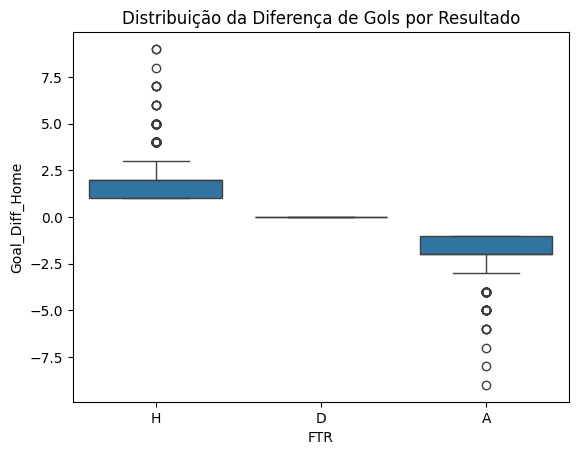

FTR
H    0.435526
A    0.334211
D    0.230263
Name: proportion, dtype: float64

In [9]:
sns.boxplot(data=dfv1, x='FTR', y='Goal_Diff_Home', order=['H','D','A'])
plt.title('Distribuição da Diferença de Gols por Resultado')
plt.show()

dfv1['FTR'].value_counts(normalize=True)

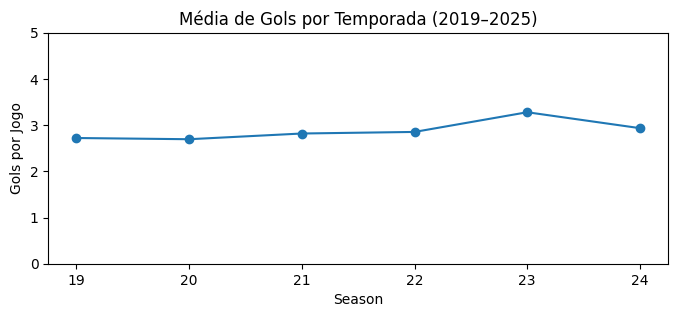

In [10]:
dfv1['Total_Goals'] = dfv1['FTHG'] + dfv1['FTAG']
dfv1.groupby('Season')['Total_Goals'].mean().plot(marker='o', figsize=(8,3))
plt.title('Média de Gols por Temporada (2019–2025)')
plt.ylabel('Gols por Jogo')
plt.ylim(0, 5)  # Começa do zero, limite superior automático

plt.show()

### Estatísticas gerais de partida

In [11]:

dfv1[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'Goal_Diff_Home']].describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,2280.0,1.554825,1.333266,0.0,1.0,1.0,2.0,9.0
FTAG,2280.0,1.328509,1.231256,0.0,0.0,1.0,2.0,9.0
HS,2280.0,13.849123,5.726473,1.0,10.0,13.0,17.0,36.0
AS,2280.0,11.692982,5.229238,1.0,8.0,11.0,15.0,37.0
HST,2280.0,4.826316,2.615747,0.0,3.0,5.0,6.0,16.0
AST,2280.0,4.135526,2.413681,0.0,2.0,4.0,5.0,15.0
HC,2280.0,5.686842,3.132891,0.0,3.0,5.0,8.0,17.0
AC,2280.0,4.739912,2.835769,0.0,3.0,4.0,6.0,19.0
HF,2280.0,10.649123,3.490808,0.0,8.0,10.0,13.0,23.0
AF,2280.0,10.874123,3.614417,1.0,8.0,11.0,13.0,25.0


- Times mandantes são ligeiramente mais agressivos e precisos em finalizações (*HS* e *HST*) 

In [12]:
dfv2 = dfv1.copy()
dfv2['Date'] = pd.to_datetime(dfv2['Date'], format='%d/%m/%Y' ,errors = 'coerce')

# Ordenando os jogos por data 
dfv2 = dfv2.sort_values(['Date', 'HomeTeam']).reset_index(drop=True)
dfv2.head()

,Div,Season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Goal_Diff_Home,Home_Win,B365H_prob,B365D_prob,B365A_prob,PSH_prob,PSA_prob,PSD_prob,B365H_prob_norm,B365D_prob_norm,B365A_prob_norm,PSH_prob_norm,PSA_prob_norm,PSD_prob_norm,Total_Goals
0,E0,19,2019-08-09,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.15,9.59,18.05,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,3,1,0.877193,0.100000,0.052632,0.869565,0.055402,0.104275,0.851789,0.097104,0.051107,0.844860,0.053828,0.101313,5
1,E0,19,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,2.04,3.57,3.90,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,0,0,0.512821,0.277778,0.277778,0.490196,0.256410,0.280112,0.480000,0.260000,0.260000,0.477440,0.249738,0.272823,2
2,E0,19,2019-08-10,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.71,3.31,2.81,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,3,1,0.381679,0.312500,0.363636,0.369004,0.355872,0.302115,0.360818,0.295420,0.343762,0.359306,0.346519,0.294175,3
3,E0,19,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.21,3.37,2.39,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,0,0,0.333333,0.307692,0.421941,0.311526,0.418410,0.296736,0.313588,0.289466,0.396947,0.303433,0.407540,0.289027,0
4,E0,19,2019-08-10,17:30,Tottenham,Aston Villa,3,1,H,0,1,A,C Kavanagh,31,7,7,4,13,9,14,0,1,0,0,0,1.30,5.25,10.00,1.30,5.84,10.96,1.33,5.95,12.00,1.30,5.53,10.51,1.66,2.20,1.64,2.40,1.70,2.40,1.65,2.26,1.97,1.93,1.99,1.93,2.00,2.00,1.93,1.94,2,1,0.769231,0.190476,0.100000,0.769231,0.091241,0.171233,0.725890,0.179744,0.094366,0.745592,0.088437,0.165971,4


In [13]:
# Feature de pontos acumulados
dfv2['MatchID'] = dfv2.index

dfv2['Points_Home'] = dfv2['FTR'].map({'H':3, 'D':1, 'A':0})
dfv2['Points_Away'] = dfv2['FTR'].map({'H':0, 'D':1, 'A':3})

# Versão longa do dataset (um registro por time em cada partida), como visitante ou mandante
home_df = dfv2[['MatchID', 'Date', 'Season', 'HomeTeam', 'Points_Home']].rename(
    columns={'HomeTeam':'Team','Points_Home':'Points'})
home_df['role'] = 'H'
away_df = dfv2[['MatchID', 'Date','Season','AwayTeam','Points_Away']].rename(
    columns={'AwayTeam':'Team','Points_Away':'Points'})
away_df['role'] = 'A'

# Unir
matches_long = pd.concat([home_df, away_df]).sort_values(['Team','Date'])
matches_long.reset_index(drop=True, inplace=True)

matches_long = matches_long.sort_values(['Date', 'MatchID', 'Team'])

# Número do jogo dentro da temporada
matches_long['Match_No'] = matches_long.groupby(['Team', 'Season']).cumcount() + 1

# Acumular pontos dentro da mesma temporada
matches_long['Cumulative_Points'] = matches_long.groupby(['Team','Season'])['Points'].cumsum()

# Pontos acumulados antes do inicio da partida
matches_long['CumPoints_Before'] = matches_long.groupby(['Team', 'Season'])['Cumulative_Points'].shift(1).fillna(0).astype(int)

home_before = (matches_long[matches_long['role']=='H'][['MatchID','CumPoints_Before']]
               .rename(columns={'CumPoints_Before':'Home_CumPoints'}))

away_before = (matches_long[matches_long['role']=='A'][['MatchID','CumPoints_Before']]
               .rename(columns={'CumPoints_Before':'Away_CumPoints'}))
        
dfv2 = dfv2.merge(home_before, on='MatchID', how='left')
dfv2 = dfv2.merge(away_before, on='MatchID', how='left')

new_column_order = ['Div', 'Season', 'Date', 'Time', 'MatchID', 'HomeTeam', 'Home_CumPoints', 'AwayTeam', 'Away_CumPoints', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'PSH', 'PSD', 'PSA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
       'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5',
       'Avg>2.5', 'Avg<2.5', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH',
       'MaxAHA', 'AvgAHH', 'AvgAHA', 'Goal_Diff_Home', 'Home_Win',
       'B365H_prob', 'B365D_prob', 'B365A_prob', 'PSH_prob', 'PSA_prob',
       'PSD_prob', 'B365H_prob_norm', 'B365D_prob_norm', 'B365A_prob_norm',
       'PSH_prob_norm', 'PSA_prob_norm', 'PSD_prob_norm', 'Points_Home',
       'Points_Away']

dfv3 = dfv2[new_column_order]

In [14]:
# Computar sequencia de vitorias e derrotas de um time, codificando seu momentum

def compute_streak(results):
    """ 
        Streak > 0: sequência de vitórias
        Streak < 0: sequência de derrotas 
        
        Resultado é resetado quando uma sequência é quebrada
    """
    streaks = []
    current_streak = 0
    prev_sign = 0

    for res in results:
        if res == 'W': sign = 1
        elif res == 'L': sign = -1
        else: sign = 0

        if sign == 0:
            current_streak = 0
        elif sign == prev_sign:
            current_streak += sign
        else:
            current_streak = sign # resetando e começando uma nova sequência
        
        streaks.append(current_streak)
        prev_sign = sign
    
    return streaks

# Convertendo resultados para perspectiva de cada time
def results_pov(row):
    if row['role'] == 'H':  # time era mandante
        if row['FTR'] == 'H': return 'W'
        elif row['FTR'] == 'A': return 'L'
        else: return 'D'
    else:  # time era visitante
        if row['FTR'] == 'A': return 'W'
        elif row['FTR'] == 'H': return 'L'
        else: return 'D'

matches_long = matches_long.merge(dfv3[['MatchID','FTR']], on='MatchID', how='left')

# Agora aplicamos uma única função simples
matches_long['Result_POV'] = matches_long.apply(results_pov, axis=1)

# Calcular streaks
matches_long['Streak'] = matches_long.groupby(['Team','Season'])['Result_POV'].transform(compute_streak)

matches_long['Streak_Before'] = matches_long.groupby(['Team', 'Season'])['Streak'].shift(1).fillna(0).astype(int)

home_before = (
    matches_long.query("role == 'H'")[['MatchID','Streak_Before']]
    .rename(columns={'Streak_Before':'Home_Streak'})
)
away_before = (
    matches_long.query("role == 'A'")[['MatchID','Streak_Before']]
    .rename(columns={'Streak_Before':'Away_Streak'})
)
        
dfv3 = dfv3.merge(home_before, on='MatchID', how='left')
dfv3 = dfv3.merge(away_before, on='MatchID', how='left')

dfv3.head(20)

,Div,Season,Date,Time,MatchID,HomeTeam,Home_CumPoints,AwayTeam,Away_CumPoints,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Goal_Diff_Home,Home_Win,B365H_prob,B365D_prob,B365A_prob,PSH_prob,PSA_prob,PSD_prob,B365H_prob_norm,B365D_prob_norm,B365A_prob_norm,PSH_prob_norm,PSA_prob_norm,PSD_prob_norm,Points_Home,Points_Away,Home_Streak,Away_Streak
0,E0,19,2019-08-09,20:00,0,Liverpool,0,Norwich,0,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.15,9.59,18.05,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,3,1,0.877193,0.100000,0.052632,0.869565,0.055402,0.104275,0.851789,0.097104,0.051107,0.844860,0.053828,0.101313,3,0,0,0
1,E0,19,2019-08-10,15:00,1,Bournemouth,0,Sheffield United,0,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,2.04,3.57,3.90,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,0,0,0.512821,0.277778,0.277778,0.490196,0.256410,0.280112,0.480000,0.260000,0.260000,0.477440,0.249738,0.272823,1,1,0,0
2,E0,19,2019-08-10,15:00,2,Burnley,0,Southampton,0,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.71,3.31,2.81,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,3,1,0.381679,0.312500,0.363636,0.369004,0.355872,0.302115,0.360818,0.295420,0.343762,0.359306,0.346519,0.294175,3,0,0,0
3,E0,19,2019-08-10,15:00,3,Crystal Palace,0,Everton,0,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.21,3.37,2.39,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,0,0,0.333333,0.307692,0.421941,0.311526,0.418410,0.296736,0.313588,0.289466,0.396947,0.303433,0.407540,0.289027,1,1,0,0
4,E0,19,2019-08-10,17:30,4,Tottenham,0,Aston Villa,0,3,1,H,0,1,A,C Kavanagh,31,7,7,4,13,9,14,0,1,0,0,0,1.30,5.25,10.00,1.30,5.84,10.96,1.33,5.95,12.00,1.30,5.53,10.51,1.66,2.20,1.64,2.40,1.70,2.40,1.65,2.26,1.97,1.93,1.99,1.93,2.00,2.00,1.93,1.94,2,1,0.769231,0.190476,0.100000,0.769231,0.091241,0.171233,0.725890,0.179744,0.094366,0.745592,0.088437,0.165971,3,0,0,0
5,E0,19,2019-08-10,15:00,5,Watford,0,Brighton,0,0,3,A,0,1,A,C Pawson,11,5,3,3,15,11,5,2,0,1,0,0,1.90,3.40,4.00,1.98,3.44,4.37,2.00,3.50,4.60,1.94,3.41,4.26,2.10,1.72,2.19,1.76,2.24,1.76,2.16,1.71,1.95,1.95,1.98,1.95,1.98,1.98,1.94,1.94,-3,0,0.526316,0.294118,0.250000,0.505051,0.228833,0.290698,0.491685,0.274765,0.233550,0.492934,0.223343,0.283723,0,3,0,0
6,E0,19,2019-08-10,12:30,6,West Ham,0,Man City,0,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.68,6.53,1.26,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,-5,0,0.083333,0.153846,0.819672,0.085616,0.793651,0.153139,0.078851,0.145570,0.775579,0.082929,0.768739,0.148332,0,3,0,0
7,E0,19,2019-08-11,14:00,7,Leicester,0,Wolves,0,0,0,D,0,0,D,A Marriner,15,8,1,2,3,13,12,3,0,2,0,0,2.20,3.20,3.40,2.21,3.34,3.66,2.29,3.38,3.66,2.22,3.28,3.48,2.20,1.66,2.23,1.74,2.25,1.74,2.17,1.70,1.90,2.00,1.90,2.04,1.95,2.04,1.91,1.98,0,0,0.454545,0.312500,0.294118,0.452489,0.273224,0.299401,0.428346,0.294488,0.277165,0.441403,0.266530,0.292066,1,1,0,0
8,E0,19,2019-08-11,16:30,8,Man United,0,Chelsea,0,4,0,H,1,0,H,A Taylor,11,18,5,7,15,13,3,5,3,4,0,0,2.10,3.30,3.50,2.21,3.37,3.63,2.28,3.43,3.63,2.19,3.32,3.49,2.00,1.80,2.05,1.87,2.10,1.87,2.01,1.83,1.90,2.00,1.90,2.04,1.92,2.04,1.89,2.00,4,1,0.476190,0.303030,0.285714,0.452489,0.275482,0.296736,0.447154,0.284553,0.268293,0.441579,0.268840,0.289581,3,0,0,0
9,E0,19,2019-08-11,14:00,9,Newcastle,0,Arsenal,0,0,1,A,0,0,D,M Atkinson,9,8,2,2,12,7,5,3,1,3,0,0,4.50,3.75,1.72,4.58,3.93,1.81,4.70,4.00,1.83,4.49,3.82,1.79,1.80,2.00,1.83,2.10,1.83,2.14,1.77,2.07,1.85

In [15]:
# Reodernação das colunas
new_column_order = ['Div', 'Season', 'Date', 'Time', 'MatchID', 'HomeTeam', 'Home_CumPoints', 'Home_Streak', 'AwayTeam', 'Away_Streak', 'Away_CumPoints', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'PSH', 'PSD', 'PSA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
       'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5',
       'Avg>2.5', 'Avg<2.5', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH',
       'MaxAHA', 'AvgAHH', 'AvgAHA', 'Goal_Diff_Home', 'Home_Win',
       'B365H_prob', 'B365D_prob', 'B365A_prob', 'PSH_prob', 'PSA_prob',
       'PSD_prob', 'B365H_prob_norm', 'B365D_prob_norm', 'B365A_prob_norm',
       'PSH_prob_norm', 'PSA_prob_norm', 'PSD_prob_norm', 'Points_Home',
       'Points_Away']

dfv3 = dfv3[new_column_order]

# Exemplo do Arsenal
dfv3[(dfv3['HomeTeam'] == 'Arsenal') | (dfv3['AwayTeam'] == 'Arsenal')].head(10)

,Div,Season,Date,Time,MatchID,HomeTeam,Home_CumPoints,Home_Streak,AwayTeam,Away_Streak,Away_CumPoints,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Goal_Diff_Home,Home_Win,B365H_prob,B365D_prob,B365A_prob,PSH_prob,PSA_prob,PSD_prob,B365H_prob_norm,B365D_prob_norm,B365A_prob_norm,PSH_prob_norm,PSA_prob_norm,PSD_prob_norm,Points_Home,Points_Away
9,E0,19,2019-08-11,14:00,9,Newcastle,0,0,Arsenal,0,0,0,1,A,0,0,D,M Atkinson,9,8,2,2,12,7,5,3,1,3,0,0,4.50,3.75,1.72,4.58,3.93,1.81,4.70,4.00,1.83,4.49,3.82,1.79,1.80,2.00,1.83,2.10,1.83,2.14,1.77,2.07,1.85,2.05,1.86,2.07,1.88,2.08,1.85,2.03,-1,0,0.222222,0.266667,0.581395,0.218341,0.552486,0.254453,0.207629,0.249155,0.543216,0.212957,0.538864,0.248179,0,3
10,E0,19,2019-08-17,12:30,10,Arsenal,3,1,Burnley,1,3,2,1,H,1,1,D,M Dean,16,18,9,5,13,11,10,7,2,1,0,0,1.30,5.50,10.00,1.34,5.68,9.35,1.36,5.75,11.00,1.33,5.49,9.48,1.57,2.37,1.61,2.47,1.65,2.47,1.60,2.34,2.02,1.91,2.05,1.88,2.06,1.95,1.98,1.90,1,1,0.769231,0.181818,0.100000,0.746269,0.106952,0.176056,0.731870,0.172987,0.095143,0.725042,0.103910,0.171049,3,0
22,E0,19,2019-08-24,17:30,22,Liverpool,6,2,Arsenal,2,6,3,1,H,1,0,H,A Taylor,25,9,5,3,8,5,6,4,1,1,0,0,1.50,4.60,6.00,1.48,4.98,6.47,1.53,5.00,6.50,1.50,4.76,6.09,1.44,2.75,1.45,2.97,1.47,2.97,1.44,2.79,2.03,1.87,2.05,1.88,2.08,1.89,2.03,1.86,2,1,0.666667,0.217391,0.166667,0.675676,0.154560,0.200803,0.634483,0.206897,0.158621,0.655335,0.149907,0.194758,3,0
38,E0,19,2019-09-01,16:30,38,Arsenal,6,-1,Tottenham,-1,4,2,2,D,1,2,A,M Atkinson,26,13,8,9,13,19,11,6,3,5,0,0,2.37,3.60,2.80,2.38,3.67,3.00,2.43,3.75,3.00,2.38,3.63,2.90,1.57,2.37,1.59,2.52,1.60,2.52,1.57,2.40,2.10,1.83,2.07,1.85,2.12,1.85,2.07,1.83,0,0,0.421941,0.277778,0.357143,0.420168,0.333333,0.272480,0.399240,0.262833,0.337928,0.409528,0.324892,0.265580,1,1
48,E0,19,2019-09-15,16:30,48,Watford,1,0,Arsenal,0,7,2,2,D,0,2,A,A Taylor,31,10,7,4,14,4,7,1,3,3,0,0,3.60,3.60,2.00,3.66,3.74,2.06,3.90,3.90,2.08,3.64,3.74,2.01,1.57,2.37,1.57,2.56,1.61,2.56,1.57,2.41,1.89,2.04,1.87,2.06,1.91,2.08,1.87,2.02,0,0,0.277778,0.277778,0.500000,0.273224,0.485437,0.267380,0.263158,0.263158,0.473684,0.266290,0.473117,0.260594,1,1
56,E0,19,2019-09-22,16:30,56,Arsenal,8,0,Aston Villa,0,4,3,2,H,0,1,A,J Moss,21,14,6,9,13,15,9,4,5,1,1,0,1.40,4.75,8.00,1.43,4.86,8.01,1.45,5.05,8.25,1.42,4.90,7.49,1.44,2.75,1.47,2.88,1.48,2.88,1.45,2.77,1.95,1.98,1.96,1.97,1.96,2.05,1.90,1.98,1,1,0.714286,0.210526,0.125000,0.699301,0.124844,0.205761,0.680394,0.200537,0.119069,0.678995,0.121219,0.199787,3,0
69,E0,19,2019-09-30,20:00,69,Man United,8,-1,Arsenal,1,11,1,1,D,1,0,H,K Friend,16,10,4,5,18,13,8,7,4,2,0,0,2.37,3.50,2.90,2.41,3.56,3.03,2.43,3.65,3.15,2.36,3.53,2.99,1.61,2.30,1.67,2.34,1.68,2.39,1.63,2.28,2.07,1.86,2.08,1.85,2.08,1.87,2.05,1.84,0,0,0.421941,0.285714,0.344828,0.414938,0.330033,0.280899,0.400901,0.271467,0.327633,0.404474,0.321710,0.273815,1,1
76,E0,19,2019-10-06,14:00,76,Arsenal,12,0,Bournemouth,0,11,1,0,H,1,0,H,M Atkinson,12,10,2,2,12,6,14,5,1,2,0,0,1.44,4.75,7.00,1.44,5.08,7.13,1.50,5.20,7.20,1.45,4.97,6.68,1.33,3.40,1.36,3.41,1.40,3.41,1.35,3.20,1.97,1.96,1.94,1.98,1.99,2.02,1.93,1.96,1,1,0.694444,0.210526,0.142857,0.694444,0.140252,0.196850,0.662747,0.200917,0.136336,0.673207,0.135963,0.190830,3,0
89,E0,19,2019-10-21,20:00,89,Sheffield United,9,0,Arsenal,1,15,1,0,H,1,0,H,M Dean,8,9,2,3,10,12,7,12,4,4,0,0,3.90,3.75,1.90,3.96,3.83,1.96,4.00,3.94,1.98,3.88,3.79,1.93,1.66,2.20,1.71,2.25,1.75,2.28,1.69,2.19,1.97,1.93,1.97,1.96,2.00,1.96,1.96,1.92,1,1,0.256410,0.266667,0.526316,0.252525,0.510204,0.261097,0.244342,0.254115,0.501543,0.246649,0.498331,0.255021,3,0
96,E0,19,2019-10-27,16:30,96,Arsenal,15,-1,Crystal Palace,-1,14,2,2,D,2,1,H,M Atkinson,15,10,6,4,18,9,12,5,2,0,0,0,1.45,4.75,6.50,1.51,4.66,6.54,1.54,4.80,7.00,1.49,4.63,6.49,1.53,2.50,1.56,2.57,1.56,

In [16]:
# [Feature] - Diferença entre odds (mandante - visitante)
dfv3['B365_gap'] = dfv3['B365H'] - dfv3['B365A']
dfv3['PS_gap'] = dfv3['PSH'] - dfv3['PSA']

odds_cols.extend(['B365_gap','PS_gap'])
dfv3[odds_cols].head(10)

,B365H,B365D,B365A,PSH,PSA,PSD,B365_gap,PS_gap
0,1.14,10.00,19.00,1.15,18.05,9.59,-17.86,-16.90
1,1.95,3.60,3.60,2.04,3.90,3.57,-1.65,-1.86
2,2.62,3.20,2.75,2.71,2.81,3.31,-0.13,-0.10
3,3.00,3.25,2.37,3.21,2.39,3.37,0.63,0.82
4,1.30,5.25,10.00,1.30,10.96,5.84,-8.70,-9.66
5,1.90,3.40,4.00,1.98,4.37,3.44,-2.10,-2.39
6,12.00,6.50,1.22,11.68,1.26,6.53,10.78,10.42
7,2.20,3.20,3.40,2.21,3.66,3.34,-1.20,-1.45
8,2.10,3.30,3.50,2.21,3.63,3.37,-1.40,-1.42
9,4.50,3.75,1.72,4.58,1.81,3.93,2.78,2.77


## Features Adicionais
- Win rate do time nos últimos 5 jogos - WinRate5
- Razão Gols Marcados (GF) e Sofridos (GA) - GFGA5

In [17]:
import numpy as np
import pandas as pd

dfv4 = dfv3.copy()

# Visão individual de cada time - Mandante x Visitante
home_part = (dfv4[['MatchID','Date','Season','HomeTeam','FTR','FTHG','FTAG']]
             .rename(columns={'HomeTeam':'Team'}))
home_part['role'] = 'H'

away_part = (dfv4[['MatchID','Date','Season','AwayTeam','FTR','FTHG','FTAG']]
             .rename(columns={'AwayTeam':'Team'}))
away_part['role'] = 'A'

matches_long2 = pd.concat([home_part, away_part], ignore_index=True)

In [18]:

# [Feature] - GF/GA do ponto de vista do time
matches_long2['GF'] = np.where(matches_long2['role'].eq('H'),
                               matches_long2['FTHG'], matches_long2['FTAG'])
matches_long2['GA'] = np.where(matches_long2['role'].eq('H'),
                               matches_long2['FTAG'], matches_long2['FTHG'])

# Resultado do ponto de vista do time 
matches_long2['Result_POV'] = matches_long2.apply(results_pov, axis= 1)
matches_long2['Win'] = (matches_long2['Result_POV'] == 'W').astype(int)

matches_long2 = matches_long2.sort_values(['Team','Season','Date','MatchID'])

g = matches_long2.groupby(['Team','Season'], sort=False)

# Ajuste da janela temporal para manter o histórico do time antes da partida
matches_long2['WinRate5_Before'] = g['Win'].transform(lambda s: s.shift(1).rolling(5, min_periods=1).mean()).fillna(0.0)
matches_long2['GF5_Before']      = g['GF'] .transform(lambda s: s.shift(1).rolling(5, min_periods=1).sum()).fillna(0.0)
matches_long2['GA5_Before']      = g['GA'] .transform(lambda s: s.shift(1).rolling(5, min_periods=1).sum()).fillna(0.0)

# Razão Suavizada - Tratando 
matches_long2['GFGA5_Before'] = matches_long2['GF5_Before'] / matches_long2['GA5_Before'].replace(0, np.nan)

home_feats = (matches_long2[matches_long2['role']=='H']
              [['MatchID','WinRate5_Before','GF5_Before','GA5_Before','GFGA5_Before']]
              .rename(columns={'WinRate5_Before':'Home_WinRate5',
                               'GF5_Before':'Home_GF5',
                               'GA5_Before':'Home_GA5',
                               'GFGA5_Before':'Home_GFGA5'}))

away_feats = (matches_long2[matches_long2['role']=='A']
              [['MatchID','WinRate5_Before','GF5_Before','GA5_Before','GFGA5_Before']]
              .rename(columns={'WinRate5_Before':'Away_WinRate5',
                               'GF5_Before':'Away_GF5',
                               'GA5_Before':'Away_GA5',
                               'GFGA5_Before':'Away_GFGA5'}))

# limpe versões antigas
drop_cols = [c for c in dfv4.columns if c.startswith(('Home_WinRate5','Away_WinRate5','Home_GF5','Away_GF5','Home_GA5','Away_GA5','Home_GFGA5','Away_GFGA5'))]
dfv4 = dfv4.drop(columns=drop_cols, errors='ignore')

dfv4 = dfv4.merge(home_feats, on='MatchID', how='left')
dfv4 = dfv4.merge(away_feats, on='MatchID', how='left')

dfv4.iloc[30:50]

,Div,Season,Date,Time,MatchID,HomeTeam,Home_CumPoints,Home_Streak,AwayTeam,Away_Streak,Away_CumPoints,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Goal_Diff_Home,Home_Win,B365H_prob,B365D_prob,B365A_prob,PSH_prob,PSA_prob,PSD_prob,B365H_prob_norm,B365D_prob_norm,B365A_prob_norm,PSH_prob_norm,PSA_prob_norm,PSD_prob_norm,Points_Home,Points_Away,B365_gap,PS_gap,Home_WinRate5,Home_GF5,Home_GA5,Home_GFGA5,Away_WinRate5,Away_GF5,Away_GA5,Away_GFGA5
30,E0,19,2019-08-31,17:30,30,Burnley,4,0,Liverpool,3,9,0,3,A,0,2,A,C Kavanagh,7,15,2,7,10,16,6,4,0,0,0,0,9.50,5.50,1.30,10.24,5.37,1.34,11.00,5.70,1.37,9.45,5.43,1.33,1.61,2.30,1.65,2.39,1.65,2.40,1.61,2.33,1.90,2.03,1.88,2.04,1.92,2.05,1.89,2.00,-3,0,0.105263,0.181818,0.769231,0.097656,0.746269,0.186220,0.099652,0.172125,0.728223,0.094799,0.724431,0.180770,0,3,8.20,8.90,0.333333,5.0,3.0,1.666667,1.000000,9.0,3.0,3.000000
31,E0,19,2019-08-31,15:00,31,Chelsea,4,1,Sheffield United,-1,4,2,2,D,2,0,H,S Attwell,13,8,5,2,6,11,3,4,0,1,0,0,1.36,4.75,9.00,1.36,5.12,10.23,1.40,5.30,10.75,1.36,4.98,9.53,1.72,2.10,1.76,2.18,1.77,2.20,1.73,2.13,2.05,1.75,2.15,1.79,2.19,1.82,2.11,1.79,0,0,0.735294,0.210526,0.111111,0.735294,0.097752,0.195312,0.695688,0.199186,0.105126,0.715017,0.095056,0.189927,1,1,-7.64,-8.87,0.333333,4.0,7.0,0.571429,0.333333,3.0,3.0,1.000000
32,E0,19,2019-08-31,15:00,32,Crystal Palace,4,1,Aston Villa,1,3,1,0,H,0,0,D,K Friend,22,10,5,2,15,16,13,2,2,4,0,1,2.15,3.30,3.50,2.22,3.44,3.50,2.27,3.46,3.60,2.21,3.38,3.43,1.90,1.90,2.03,1.89,2.03,1.92,1.97,1.86,1.91,2.02,1.92,2.01,1.92,2.03,1.89,2.00,1,1,0.465116,0.303030,0.285714,0.450450,0.285714,0.290698,0.441345,0.287543,0.271112,0.438667,0.278240,0.283093,3,0,-1.35,-1.28,0.333333,2.0,2.0,1.000000,0.333333,4.0,5.0,0.800000
33,E0,19,2019-08-31,15:00,33,Leicester,5,1,Bournemouth,-1,4,3,1,H,2,1,H,P Bankes,13,8,5,2,9,11,4,5,1,3,0,0,1.70,4.00,4.75,1.71,4.12,4.95,1.77,4.12,5.00,1.72,4.02,4.81,1.66,2.20,1.67,2.33,1.70,2.33,1.65,2.26,1.93,2.00,1.93,2.00,1.95,2.01,1.91,1.98,2,1,0.588235,0.250000,0.210526,0.584795,0.202020,0.242718,0.560886,0.238376,0.200738,0.568019,0.196225,0.235756,3,0,-3.05,-3.24,0.333333,3.0,2.0,1.500000,0.333333,4.0,5.0,0.800000
34,E0,19,2019-08-31,15:00,34,Man City,7,1,Brighton,-1,4,4,0,H,2,0,H,J Moss,15,6,6,2,10,6,8,1,1,1,0,0,1.08,10.00,26.00,1.08,13.01,34.71,1.10,13.01,36.00,1.09,11.73,30.92,1.30,3.50,1.30,3.82,1.32,3.82,1.30,3.53,1.97,1.96,1.95,1.97,1.98,1.98,1.95,1.94,4,1,0.925926,0.100000,0.038462,0.925926,0.028810,0.076864,0.869914,0.093951,0.036135,0.897563,0.027928,0.074509,3,0,-24.92,-33.63,0.666667,10.0,3.0,3.333333,0.333333,4.0,3.0,1.333333
35,E0,19,2019-08-31,15:00,35,Newcastle,3,1,Watford,-3,0,1,1,D,1,1,D,G Scott,13,13,5,3,5,11,6,5,2,3,0,0,2.50,3.25,2.87,2.73,3.22,2.86,2.73,3.32,3.00,2.63,3.24,2.86,2.00,1.80,2.12,1.81,2.20,1.83,2.08,1.77,1.90,2.03,1.92,2.01,1.92,2.04,1.88,2.01,0,0,0.400000,0.307692,0.348432,0.366300,0.349650,0.310559,0.378743,0.291341,0.329916,0.356841,0.340621,0.302539,1,1,-0.37,-0.13,0.333333,2.0,4.0,0.500000,0.000000,1.0,7.0,0.142857
36,E0,19,2019-08-31,12:30,36,Southampton,3,1,Man United,-1,4,1,1,D,0,1,A,M Dean,10,21,2,8,17,7,2,3,1,2,1,0,3.80,3.30,2.05,3.83,3.41,2.12,3.90,3.48,2.15,3.75,3.38,2.10,1.90,1.90,1.92,2.00,1.94,2.05,1.90,1.94,2.05,1.75,2.12,1.81,2.15,1.83,2.10,1.80,0,0,0.263158,0.303030,0.487805,0.261097,0.471698,0.293255,0.249677,0.287507,0.462816,0.254468,0.459722,0.285810,1,1,1.75,1.71,0.333333,3.0,5.0,0.600000,0.333333,6.0,3.0,2.000000
37,E0,19,2019-08-31,15:00,37,West Ham,4,1,Norwich,-1,3,2,0,H,1,0,H,P Tierney,18,8,8,3,16,10,8,2,2,1,0,0,1.85,3.90,3.90,1.91,3.93,4.04,1.94,4.03,4.10,1.89,3.91,3.92,1.44,2.75,1.51,2.74,1.53,2.79,1.48,2.64,1.90,2.03,1.91,2.02,1.91,2.04,1.89,2.00,2,1,0.540541,0.256410,0.256410,0.523560,0.247525,0.254453,0.513158,0.243421,0.243421,0.510523,0.241361,0

In [19]:
dfv4.to_csv('../data/premier_completo_expandido_19_25.csv', index= False)

# Análise Exploratória Dataset Expandido

Explorando o impacto das novas features para descrição no comportamento dos dados.

In [23]:
df = dfv4.copy()

display(df.head(10))

print(f'Shape: {df.shape}')


miss = df.isna().mean().mul(100).round(2).sort_values(ascending=False)
display(miss.to_frame("missing_%").head(30))

# duplicatas
print("Duplicatas (linhas idênticas):", df.duplicated().sum())

# cobertura temporal & distribuição por temporada
dcol = next((c for c in df.columns if c.lower() in {"date","match_date"}), None)
if dcol:
    print("Período:", df[dcol].min(), "→", df[dcol].max())
if "Season" in df.columns:
    display(df["Season"].value_counts().sort_index().to_frame("jogos"))


,Div,Season,Date,Time,MatchID,HomeTeam,Home_CumPoints,Home_Streak,AwayTeam,Away_Streak,Away_CumPoints,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Goal_Diff_Home,Home_Win,B365H_prob,B365D_prob,B365A_prob,PSH_prob,PSA_prob,PSD_prob,B365H_prob_norm,B365D_prob_norm,B365A_prob_norm,PSH_prob_norm,PSA_prob_norm,PSD_prob_norm,Points_Home,Points_Away,B365_gap,PS_gap,Home_WinRate5,Home_GF5,Home_GA5,Home_GFGA5,Away_WinRate5,Away_GF5,Away_GA5,Away_GFGA5
0,E0,19,2019-08-09,20:00,0,Liverpool,0,0,Norwich,0,0,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.15,9.59,18.05,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,3,1,0.877193,0.100000,0.052632,0.869565,0.055402,0.104275,0.851789,0.097104,0.051107,0.844860,0.053828,0.101313,3,0,-17.86,-16.90,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1,E0,19,2019-08-10,15:00,1,Bournemouth,0,0,Sheffield United,0,0,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,2.04,3.57,3.90,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,0,0,0.512821,0.277778,0.277778,0.490196,0.256410,0.280112,0.480000,0.260000,0.260000,0.477440,0.249738,0.272823,1,1,-1.65,-1.86,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
2,E0,19,2019-08-10,15:00,2,Burnley,0,0,Southampton,0,0,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.71,3.31,2.81,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,3,1,0.381679,0.312500,0.363636,0.369004,0.355872,0.302115,0.360818,0.295420,0.343762,0.359306,0.346519,0.294175,3,0,-0.13,-0.10,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,E0,19,2019-08-10,15:00,3,Crystal Palace,0,0,Everton,0,0,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.21,3.37,2.39,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,0,0,0.333333,0.307692,0.421941,0.311526,0.418410,0.296736,0.313588,0.289466,0.396947,0.303433,0.407540,0.289027,1,1,0.63,0.82,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
4,E0,19,2019-08-10,17:30,4,Tottenham,0,0,Aston Villa,0,0,3,1,H,0,1,A,C Kavanagh,31,7,7,4,13,9,14,0,1,0,0,0,1.30,5.25,10.00,1.30,5.84,10.96,1.33,5.95,12.00,1.30,5.53,10.51,1.66,2.20,1.64,2.40,1.70,2.40,1.65,2.26,1.97,1.93,1.99,1.93,2.00,2.00,1.93,1.94,2,1,0.769231,0.190476,0.100000,0.769231,0.091241,0.171233,0.725890,0.179744,0.094366,0.745592,0.088437,0.165971,3,0,-8.70,-9.66,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
5,E0,19,2019-08-10,15:00,5,Watford,0,0,Brighton,0,0,0,3,A,0,1,A,C Pawson,11,5,3,3,15,11,5,2,0,1,0,0,1.90,3.40,4.00,1.98,3.44,4.37,2.00,3.50,4.60,1.94,3.41,4.26,2.10,1.72,2.19,1.76,2.24,1.76,2.16,1.71,1.95,1.95,1.98,1.95,1.98,1.98,1.94,1.94,-3,0,0.526316,0.294118,0.250000,0.505051,0.228833,0.290698,0.491685,0.274765,0.233550,0.492934,0.223343,0.283723,0,3,-2.10,-2.39,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
6,E0,19,2019-08-10,12:30,6,West Ham,0,0,Man City,0,0,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.68,6.53,1.26,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,-5,0,0.083333,0.153846,0.819672,0.085616,0.793651,0.153139,0.078851,0.145570,0.775579,0.082929,0.768739,0.148332,0,3,10.78,10.42,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
7,E0,19,2019-08-11,14:00,7,Leicester,0,0,Wolves,0,0,0,0,D,0,0,D,A Marriner,15,8,1,2,3,13,12,3,0,2,0,0,2.20,3.20,3.40,2.21,3.34,3.66,2.29,3.38,3.66,2.22,3.28,3.48,2.20,1.66,2.23,1.74,2.25,1.74,2.17,1.70,1.90,2.00,1.90,2.04,1.95,2.04,1.91,1.98,0,0,0.454545,0.312500,0.294118,0.452489,0.273224,0.299401,0.428346,0.294488,0.277165,0.441403,0.266530,0.292066,1,1,-1.20,-1.45,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,E0,19,2019-08-11,16:30,8,Man United,0,0,Chelsea,0,0,4,0,H,1,0,H,A Taylor,11,18,5,7,15,13,3,5,3,4,0,0,2.1

Shape: (2280, 84)


,missing_%
Away_GFGA5,3.99
Home_GFGA5,3.86
P<2.5,0.53
P>2.5,0.53
B365<2.5,0.04
B365>2.5,0.04
Home_CumPoints,0.00
MaxAHA,0.00
B365A_prob,0.00
B365D_prob,0.00


Duplicatas (linhas idênticas): 0
Período: 2019-08-09 00:00:00 → 2025-05-25 00:00:00


,jogos
Season,
19,380
20,380
21,380
22,380
23,380
24,380


Dataset é muito bem estruturado, contando com 2280 partidas dividas em 6 temporadas de 380 jogos cada. Possui pouquíssimas instâncias com features faltantes(~3%) ou dados duplicadas. Um bom indicativo para aplicação futura de modelos preditivos. 

Cada instância possui além dos dados de identificação do evento, estatísticas da partida, odds de 2 casas de apostas e métricas históricas de desempenho dos times ao longo do campeonato, como a sua Win Rate, sequência atual de vitória/derrota etc.

In [27]:
num_cols = [
    c for c in df.columns 
    if df[c].dtype.kind in "if" and c not in []  # ajuste se quiser excluir odds aqui
]
display(df[num_cols].describe(percentiles=[.05,.25,.5,.75,.95]).T)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Season,2280.0,21.500000,1.708200,19.000000,19.000000,20.000000,21.500000,23.000000,24.000000,24.000000
MatchID,2280.0,1139.500000,658.323629,0.000000,113.950000,569.750000,1139.500000,1709.250000,2165.050000,2279.000000
Home_CumPoints,2280.0,25.476754,18.546584,0.000000,1.000000,11.000000,23.000000,38.000000,60.000000,93.000000
Home_Streak,2280.0,-0.022368,2.033275,-8.000000,-3.000000,-1.000000,0.000000,1.000000,3.000000,17.000000
Away_Streak,2280.0,0.162719,2.043690,-9.000000,-3.000000,-1.000000,0.000000,1.000000,3.000000,18.000000
Away_CumPoints,2280.0,25.612281,18.511470,0.000000,1.000000,11.000000,23.000000,38.000000,60.000000,96.000000
FTHG,2280.0,1.554825,1.333266,0.000000,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000
FTAG,2280.0,1.328509,1.231256,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,9.000000
HTHG,2280.0,0.715351,0.862220,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,5.000000
HTAG,2280.0,0.590789,0.795778,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000


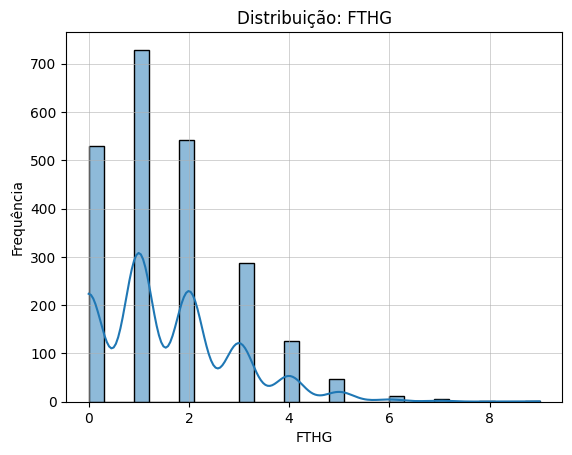

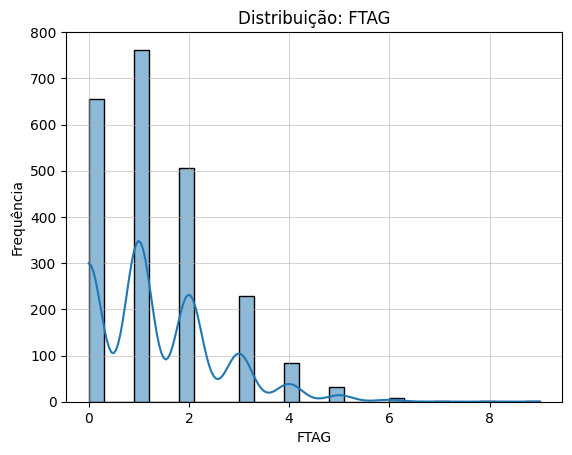

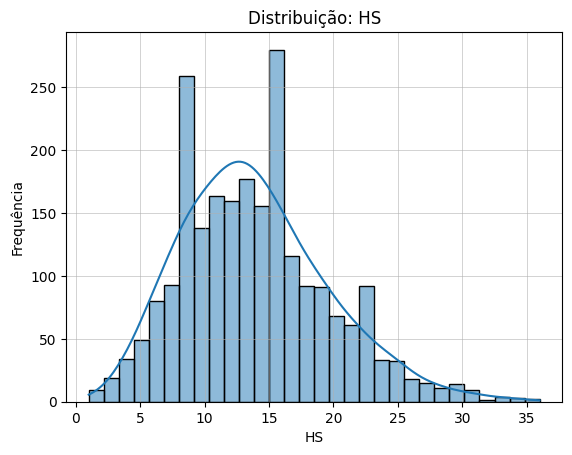

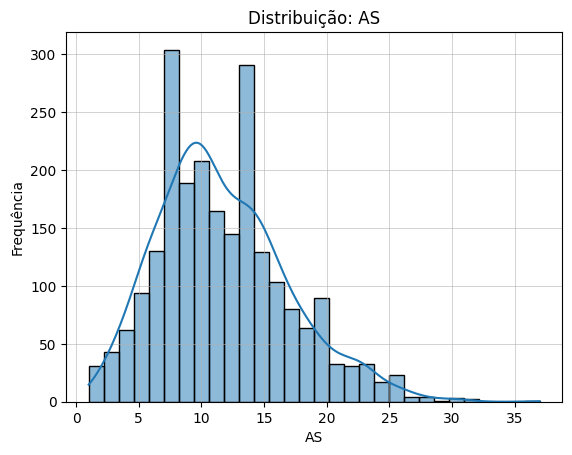

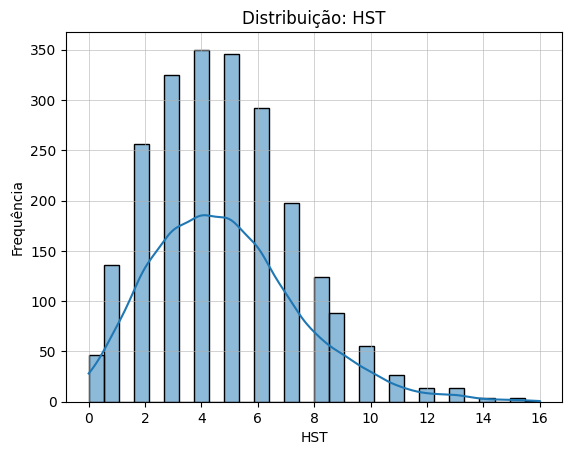

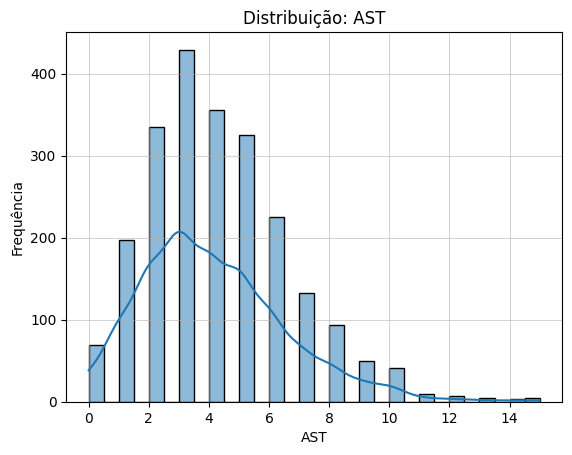

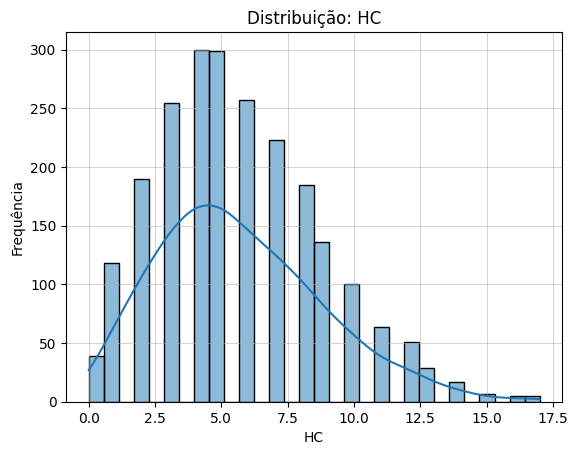

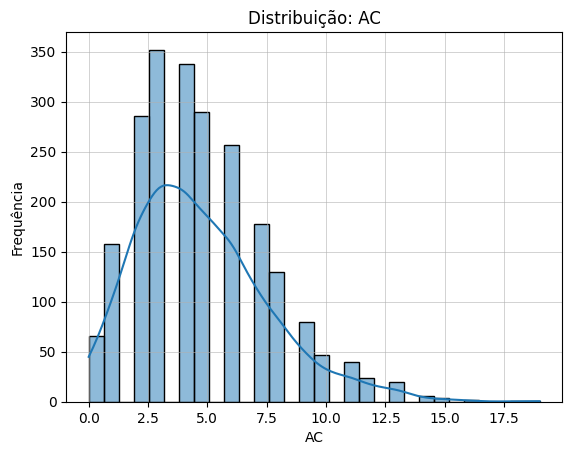

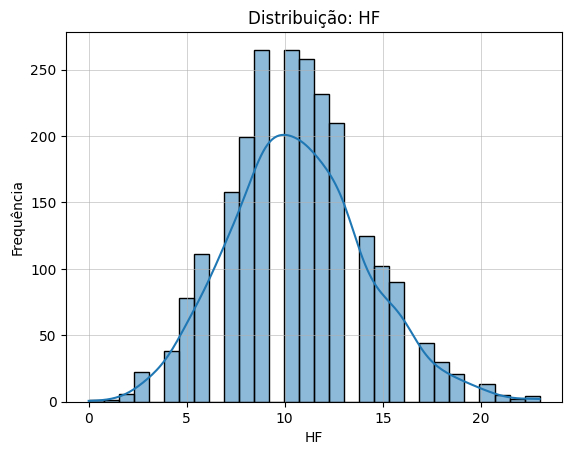

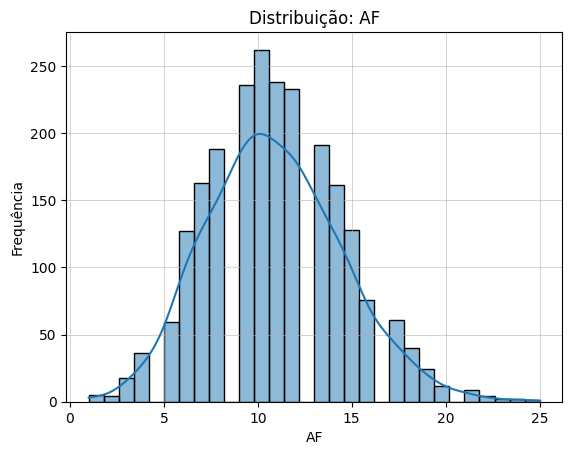

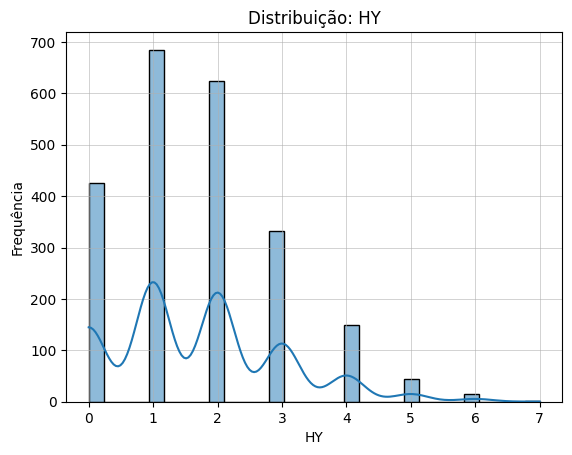

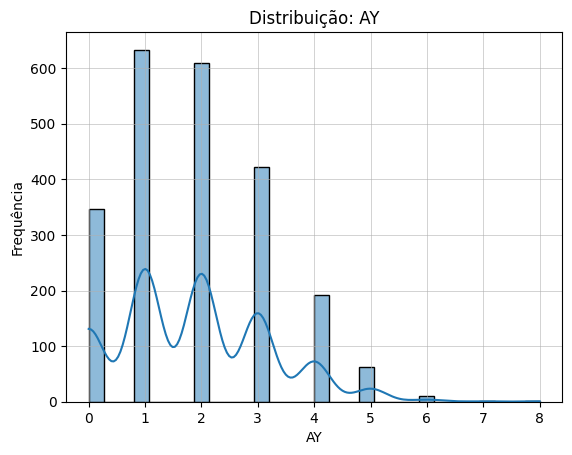

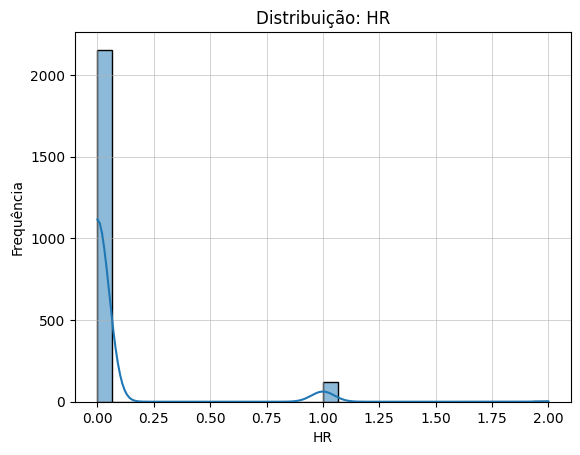

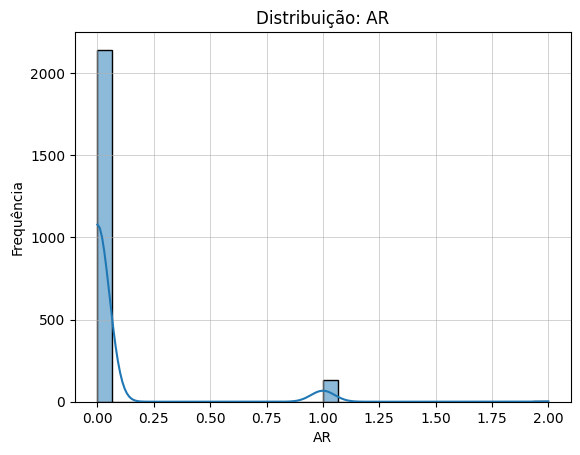

In [49]:
def distplot(df, col, bins=30, kde=True):
    s = pd.to_numeric(df[col], errors="coerce").dropna()
    ax = sns.histplot(s, bins=bins, kde=kde)
    ax.set(title=f"Distribuição: {col}", xlabel=col, ylabel="Frequência")
    plt.grid(linewidth=0.5, alpha= 0.8)
    plt.show()

for col in ["FTHG","FTAG","HS","AS","HST","AST","HC","AC","HF","AF","HY","AY","HR","AR"]:
    if col in df.columns:
        distplot(df, col)

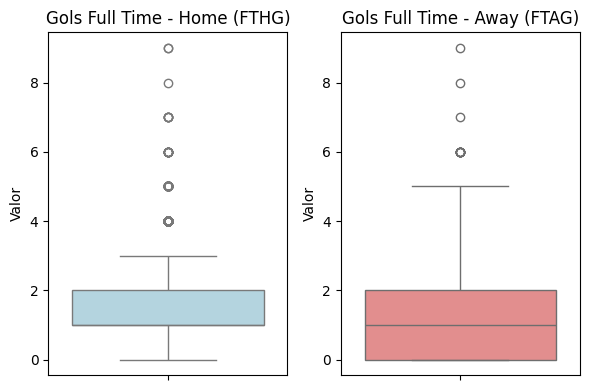

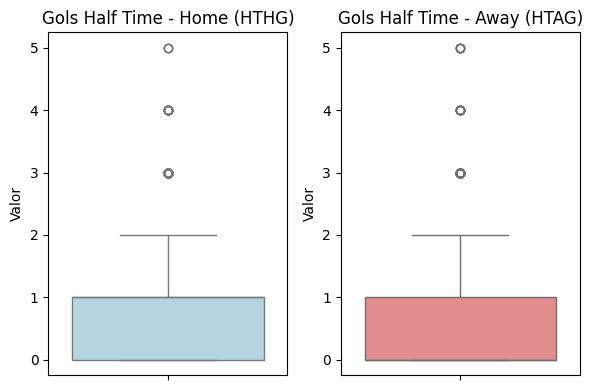

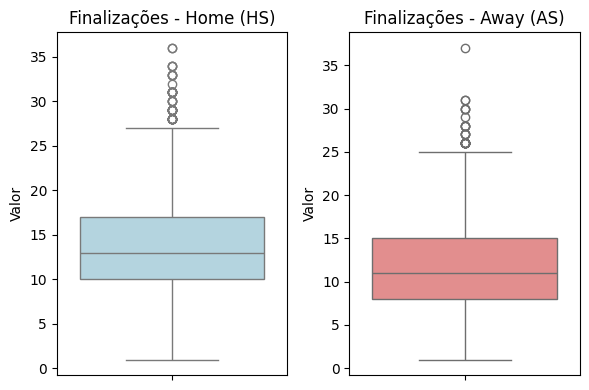

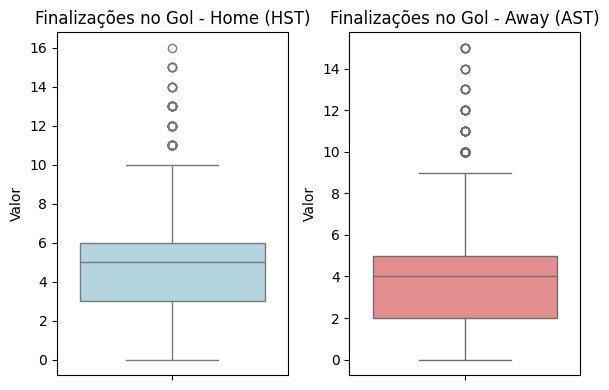

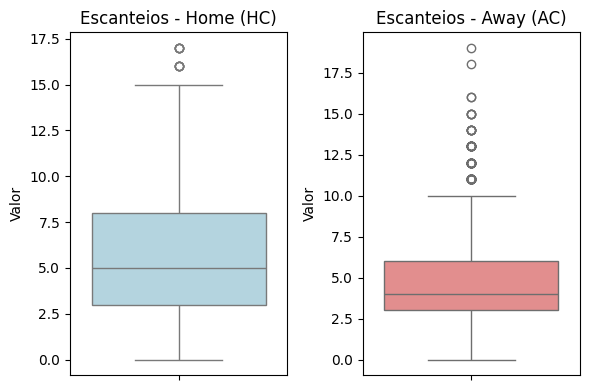

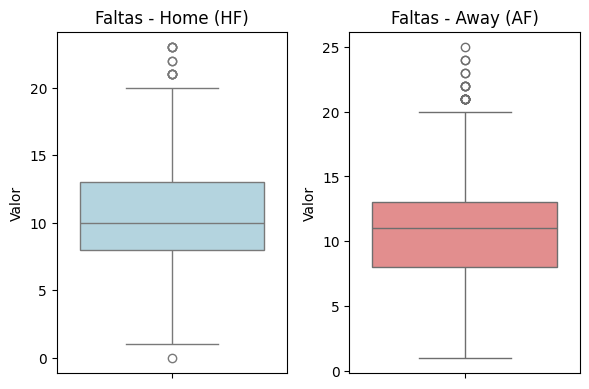

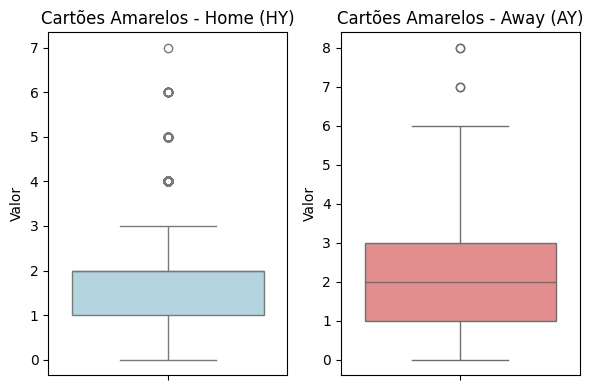

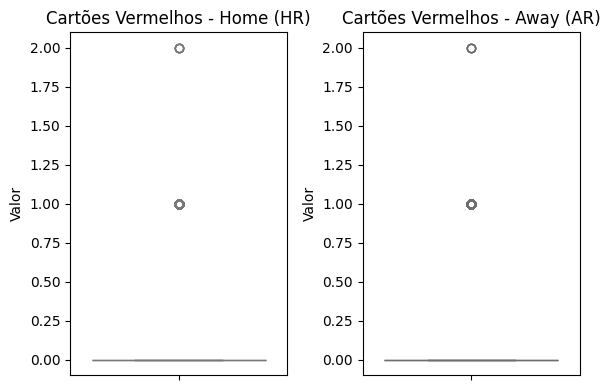

LIMITES IQR (Outliers) - Home vs Away

Gols Full Time:
  FTHG: [-0.50, 3.50]
  FTAG: [-3.00, 5.00]

Gols Half Time:
  HTHG: [-1.50, 2.50]
  HTAG: [-1.50, 2.50]

Finalizações:
  HS: [-0.50, 27.50]
  AS: [-2.50, 25.50]

Finalizações no Gol:
  HST: [-1.50, 10.50]
  AST: [-2.50, 9.50]

Escanteios:
  HC: [-4.50, 15.50]
  AC: [-1.50, 10.50]

Faltas:
  HF: [0.50, 20.50]
  AF: [0.50, 20.50]

Cartões Amarelos:
  HY: [-0.50, 3.50]
  AY: [-2.00, 6.00]

Cartões Vermelhos:
  HR: [0.00, 0.00]
  AR: [0.00, 0.00]


In [42]:
def box_violin_pair(df, home_col, away_col, title_prefix):
    """Cria boxplots lado a lado comparando métricas Home vs Away"""
    home_data = pd.to_numeric(df[home_col], errors="coerce")
    away_data = pd.to_numeric(df[away_col], errors="coerce")
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))
    
    # Boxplot Home
    sns.boxplot(y=home_data, ax=axes[0], color='lightblue')
    axes[0].set_title(f"{title_prefix} - Home ({home_col})")
    axes[0].set_ylabel("Valor")
    
    # Boxplot Away
    sns.boxplot(y=away_data, ax=axes[1], color='lightcoral')
    axes[1].set_title(f"{title_prefix} - Away ({away_col})")
    axes[1].set_ylabel("Valor")
    
    plt.tight_layout()
    plt.show()

# Pares de colunas para comparação
pairs = [
    ("FTHG", "FTAG", "Gols Full Time"),
    ("HTHG", "HTAG", "Gols Half Time"),
    ("HS", "AS", "Finalizações"),
    ("HST", "AST", "Finalizações no Gol"),
    ("HC", "AC", "Escanteios"),
    ("HF", "AF", "Faltas"),
    ("HY", "AY", "Cartões Amarelos"),
    ("HR", "AR", "Cartões Vermelhos")
]

# Gerar gráficos em pares
for home_col, away_col, title in pairs:
    if home_col in df.columns and away_col in df.columns:
        box_violin_pair(df, home_col, away_col, title)

# Limites IQR para todos os pares
print("="*60)
print("LIMITES IQR (Outliers) - Home vs Away")
print("="*60)

def iqr_limits(series):
    s = pd.to_numeric(series, errors="coerce").dropna()
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

for home_col, away_col, title in pairs:
    if home_col in df.columns and away_col in df.columns:
        lo_home, hi_home = iqr_limits(df[home_col])
        lo_away, hi_away = iqr_limits(df[away_col])
        print(f"\n{title}:")
        print(f"  {home_col}: [{lo_home:.2f}, {hi_home:.2f}]")
        print(f"  {away_col}: [{lo_away:.2f}, {hi_away:.2f}]")

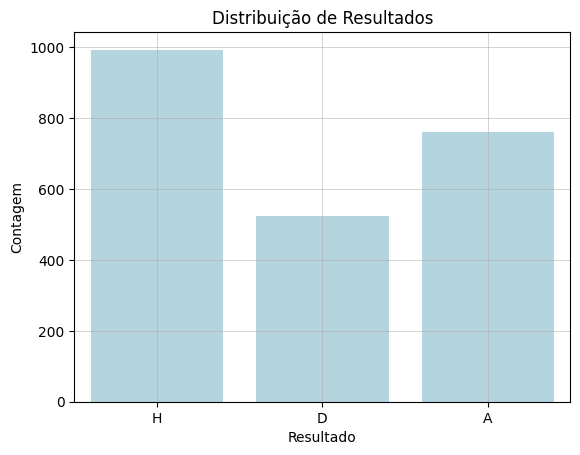

In [50]:
# Frequência de resultados
if "FTR" in df.columns:
    ax = sns.countplot(x="FTR", data=df, order=["H","D","A"], color= 'lightblue')
    ax.grid(linewidth=0.5, alpha=0.8)
    ax.set(title="Distribuição de Resultados", xlabel="Resultado", ylabel="Contagem")
    plt.show()


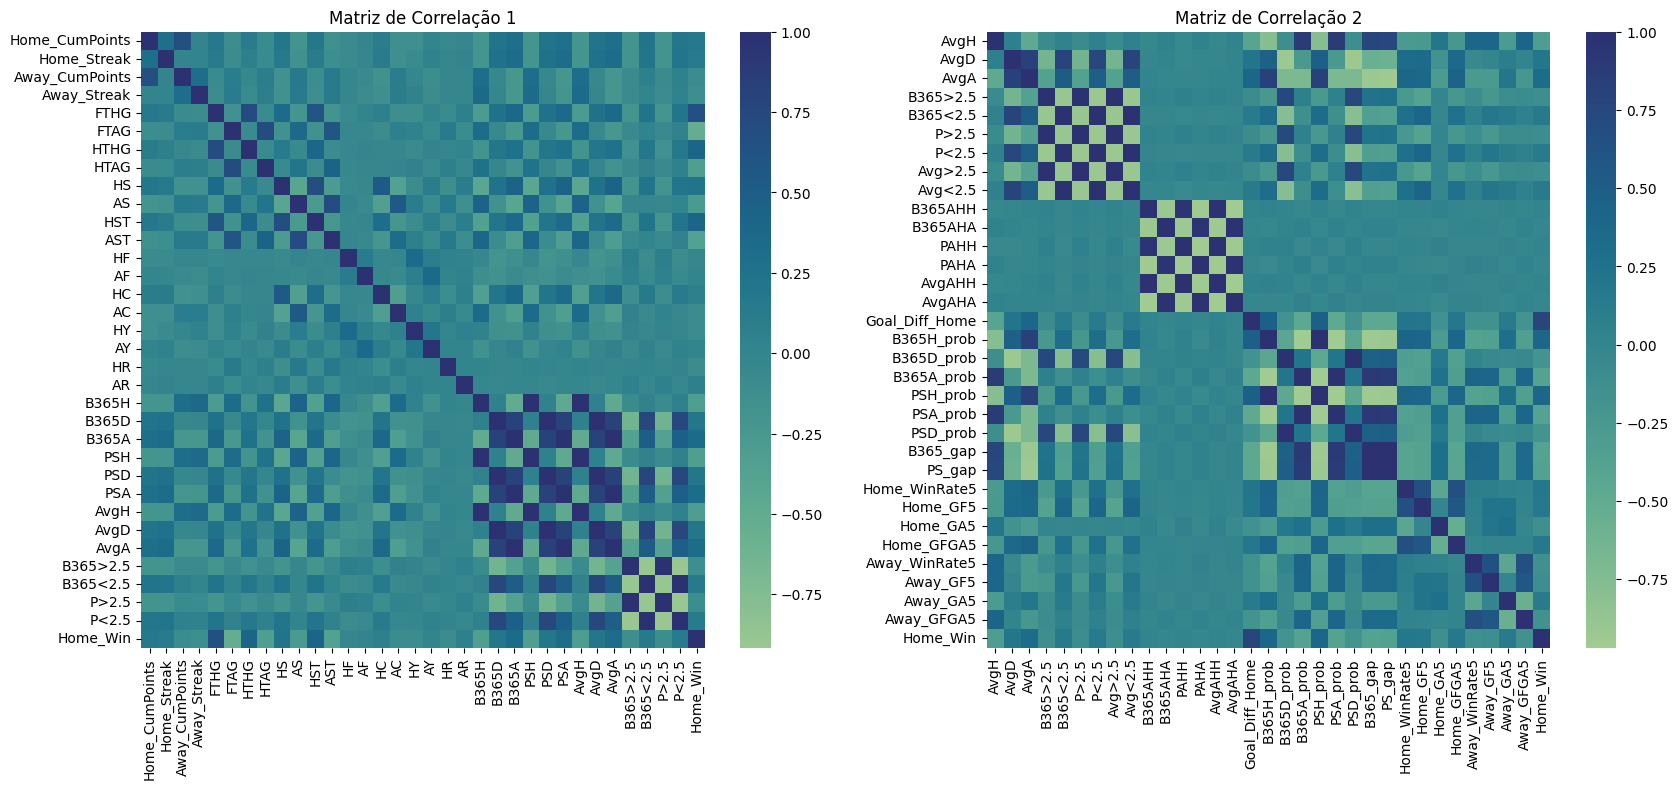

In [80]:
num_cols1 = ['Home_CumPoints', 'Home_Streak','Away_CumPoints', 'Away_Streak', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA','AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Home_Win']

num_cols2 = ['AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Avg>2.5', 'Avg<2.5', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'AvgAHH', 'AvgAHA', 'Goal_Diff_Home', 'B365H_prob', 'B365D_prob', 'B365A_prob', 'PSH_prob', 'PSA_prob', 'PSD_prob', 'B365_gap', 'PS_gap', 'Home_WinRate5', 'Home_GF5', 'Home_GA5', 'Home_GFGA5', 'Away_WinRate5', 'Away_GF5', 'Away_GA5', 'Away_GFGA5', 'Home_Win']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

corr1 = df[num_cols1].corr(method= 'pearson', numeric_only=False)
corr2 = df[num_cols2].corr(method= 'pearson', numeric_only=False)

sns.heatmap(corr1.fillna(0), cmap="crest", center=0, ax= axes[0])
axes[0].set_title("Matriz de Correlação 1")
sns.heatmap(corr2.fillna(0), cmap="crest", center=0, ax= axes[1])

axes[1].set_title("Matriz de Correlação 2")
plt.show()

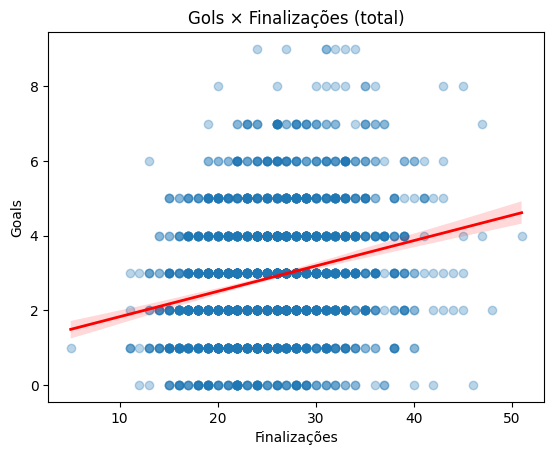

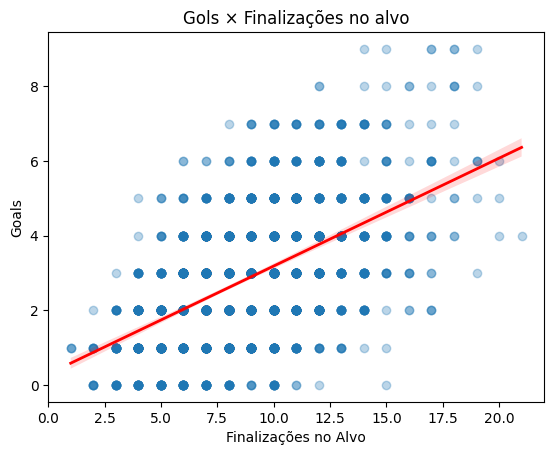

In [102]:
def reg_scatter(x, y, data, title):
    ax = sns.regplot(x=x, y=y, data=data, scatter_kws={"alpha":0.3}, line_kws={"linewidth":2, "color": 'red'})
    ax.set(title=title, xlabel=x, ylabel=y)
    plt.show()

if {"FTHG","FTAG","HS","AS","HST","AST"}.issubset(df.columns):
    dfplot = df.copy()
    dfplot["Goals"] = dfplot["FTHG"] + dfplot["FTAG"]
    dfplot["Finalizações"] = dfplot["HS"] + dfplot["AS"]
    dfplot["Finalizações no Alvo"] = dfplot["HST"] + dfplot["AST"]
    reg_scatter("Finalizações", "Goals", dfplot, "Gols × Finalizações (total)")
    reg_scatter("Finalizações no Alvo", "Goals", dfplot, "Gols × Finalizações no alvo")


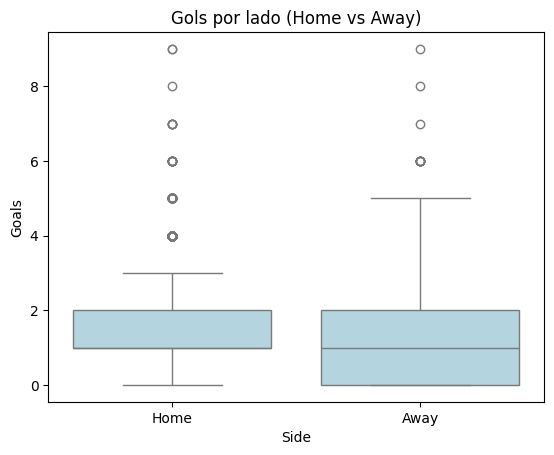

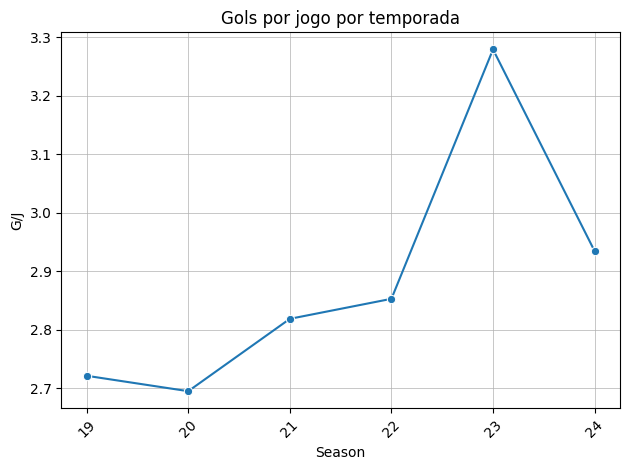

In [97]:
# Boxplot comparando gols de mandantes vs visitantes
long_g = []
if {"FTHG","FTAG"}.issubset(df.columns):
    long_g.append(pd.DataFrame({"Side":"Home","Goals":df["FTHG"]}))
    long_g.append(pd.DataFrame({"Side":"Away","Goals":df["FTAG"]}))
    gg = pd.concat(long_g, ignore_index=True)
    ax = sns.boxplot(x="Side", y="Goals", data=gg, color='lightblue')
    ax.set(title="Gols por lado (Home vs Away)")
    plt.show()

# Evolução temporal por Season
if "Season" in df.columns and "Goals" in df.columns:
    season_gpg = df.groupby("Season")["Goals"].mean().reset_index()
    ax = sns.lineplot(data=season_gpg, x="Season", y="Goals", marker="o")
    ax.grid(linewidth=0.5)
    ax.set(title="Gols por jogo por temporada", xlabel="Season", ylabel="G/J")
    plt.xticks(rotation=45); plt.tight_layout(); plt.show()

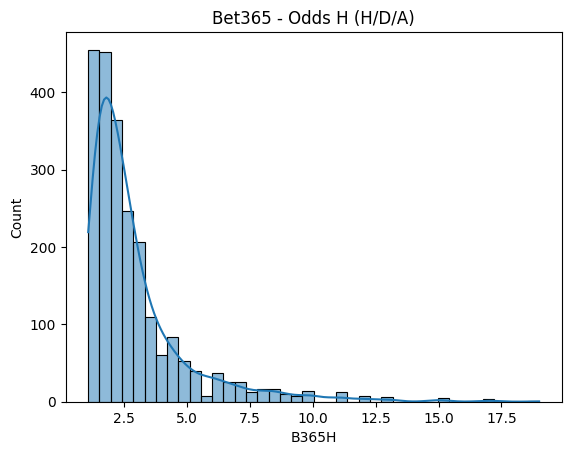

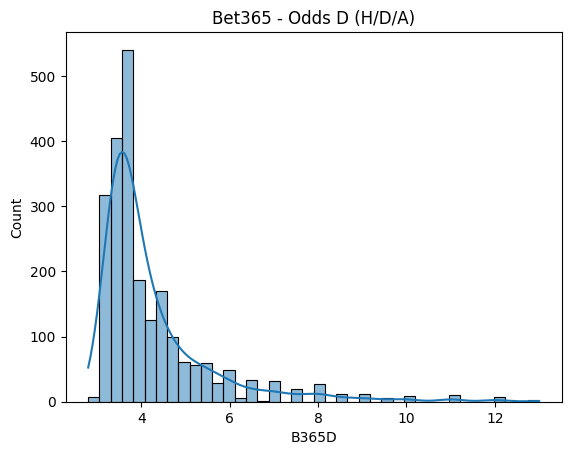

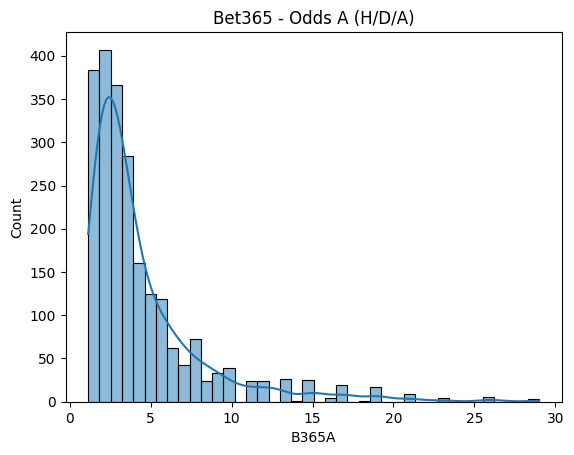

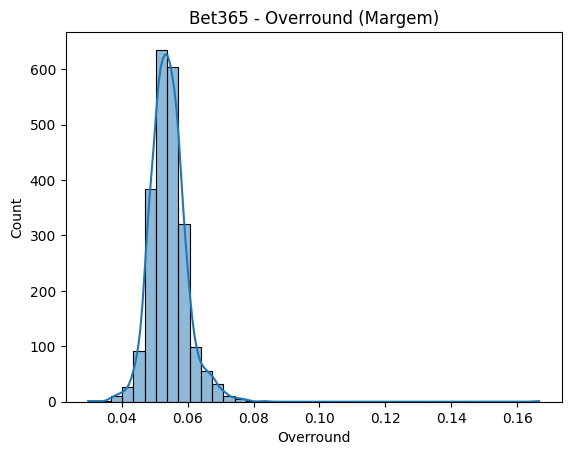

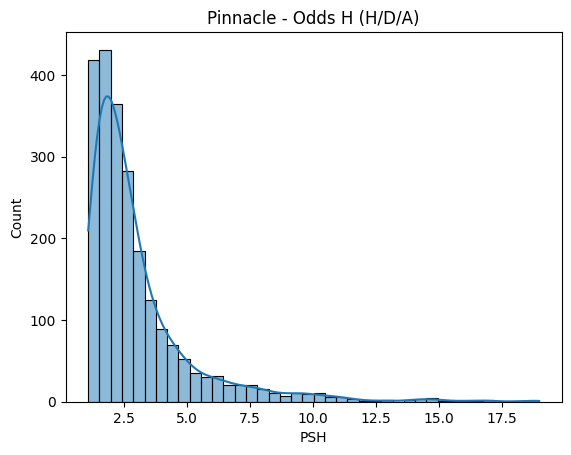

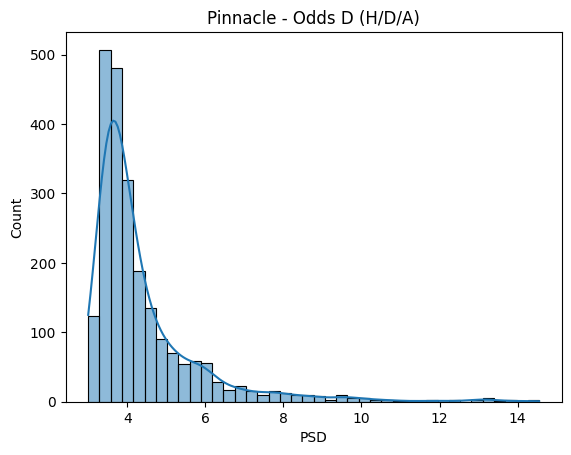

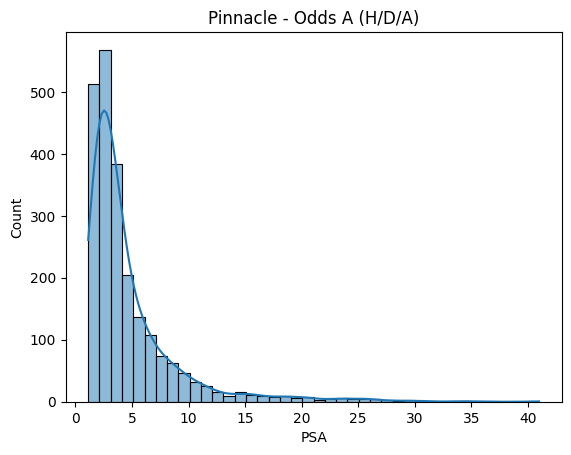

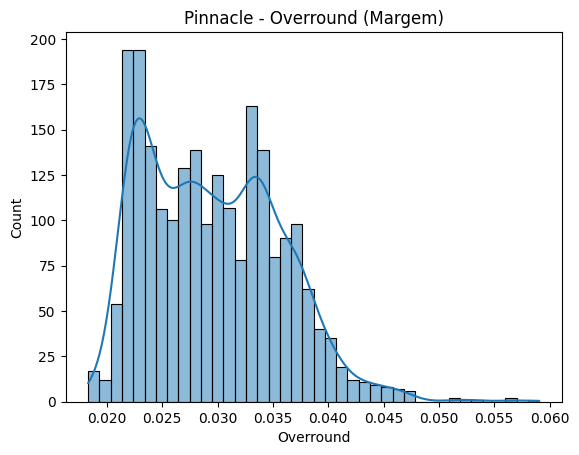

C:\Users\pedro\AppData\Local\Temp\ipykernel_29836\151913996.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calib = pd.DataFrame({"bin": bins, "p": pH, "y": yH}).groupby("bin").agg(p_mean=("p","mean"), y_rate=("y","mean"), n=("y","size")).reset_index()


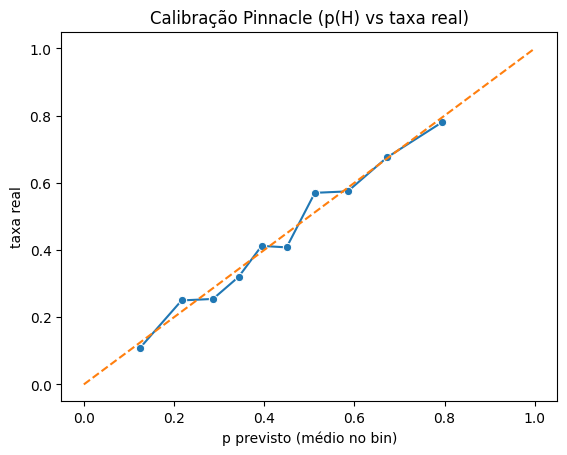

In [110]:
bookies = {
    "Bet365": ("B365H","B365D","B365A"),
    "Pinnacle": ("PSH","PSD","PSA")
}
def overround(h,d,a): return (1/h + 1/d + 1/a) - 1
def normalize_threeway(h,d,a):
    p = np.array([1/h,1/d,1/a], float); return p / p.sum()

# Distribuições de odds e overround por casa
for bk,(h,d,a) in bookies.items():
    if {h,d,a}.issubset(df.columns):
        for c in (h,d,a):
            ax = sns.histplot(df[c], bins=40, kde=True)
            ax.set(title=f"{bk} - Odds {c[-1]} (H/D/A)", xlabel=c)
            plt.show()
        ov = overround(df[h], df[d], df[a])
        ax = sns.histplot(ov, bins=40, kde=True)
        ax.set(title=f"{bk} - Overround (Margem)", xlabel="Overround")
        plt.show()

# Calibração: prob prevista p(H) × taxa real por decil
if "FTR" in df.columns and all(c in df.columns for c in bookies["Pinnacle"]):
    h,d,a = bookies["Pinnacle"]
    m = df[[h,d,a,"FTR"]].notna().all(axis=1)
    pH = np.apply_along_axis(lambda r: normalize_threeway(*r)[0], 1, df.loc[m,[h,d,a]].to_numpy())
    yH = (df.loc[m,"FTR"]=="H").astype(int).to_numpy()
    bins = pd.qcut(pH, q=10, duplicates="drop")
    calib = pd.DataFrame({"bin": bins, "p": pH, "y": yH}).groupby("bin").agg(p_mean=("p","mean"), y_rate=("y","mean"), n=("y","size")).reset_index()
    ax = sns.lineplot(data=calib, x="p_mean", y="y_rate", marker="o")
    ax.plot([0,1],[0,1], linestyle="--")  # linha perfeita
    ax.set(title="Calibração Pinnacle (p(H) vs taxa real)", xlabel="p previsto (médio no bin)", ylabel="taxa real")
    plt.show()


In [113]:
# Margem (overround) comparando casas
res = []
for bk,(h,d,a) in bookies.items():
    if {h,d,a}.issubset(df.columns):
        ov = overround(df[h], df[d], df[a])
        res.append(pd.DataFrame({"casa": bk, "overround": ov}))
if res:
    ovdf = pd.concat(res, ignore_index=True)
    display(ovdf.groupby("casa")["overround"].describe())

# Favoritos vs underdogs (limiar odds<=2.0 como favorito simples)
if {"FTR"}.issubset(df.columns):
    def fav_mask(row, h,d,a):
        if pd.isna(row[h]) or pd.isna(row[d]) or pd.isna(row[a]): return np.nan
        m = min(row[h], row[d], row[a])
        if m == row[h]: return "H"
        if m == row[a]: return "A"
        return "D"
    for bk,(h,d,a) in bookies.items():
        if {h,d,a}.issubset(df.columns):
            lab = df.apply(lambda r: fav_mask(r,h,d,a), axis=1)
            acc = ( (lab=="H") & (df["FTR"]=="H") | (lab=="A") & (df["FTR"]=="A") | (lab=="D") & (df["FTR"]=="D") ).mean()
            print(bk, "acurácia do favorito nominal:", round(acc*100,2), "%")

# Value bets (ex.: p_implícita_norm < frequência real observada em bins)
# (já ilustrado na calibração por bins)


,count,mean,std,min,25%,50%,75%,max
casa,,,,,,,,
Bet365,2280.0,0.054112,0.005933,0.029825,0.050770,0.053756,0.056944,0.166667
Pinnacle,2280.0,0.029584,0.006110,0.018306,0.024122,0.029135,0.033975,0.059050


Bet365 acurácia do favorito nominal: 55.39 %
Pinnacle acurácia do favorito nominal: 55.09 %


In [118]:
# exemplo: apostar 1 unidade no menor odd (favorito) em todo jogo da Pinnacle
bk = "Pinnacle"
if all(c in df.columns for c in bookies[bk]):
    h,d,a = bookies[bk]
    m = df[[h,d,a,"FTR"]].notna().all(axis=1)
    stake = 1.0
    returns = []
    for _, r in df.loc[m, [h,d,a,"FTR"]].iterrows():
        pick = np.argmin([r[h], r[d], r[a]])
        pick_lbl = ["H","D","A"][pick]
        odd = [r[h],r[d],r[a]][pick]
        ret = odd*stake if r["FTR"]==pick_lbl else 0.0
        returns.append(ret - stake)
    roi = np.sum(returns) / (stake * np.sum(m))
    print(f"ROI estratégia favorito ({bk}):", round(roi*100,2), "%")

bk = "Bet365"
if all(c in df.columns for c in bookies[bk]):
    h,d,a = bookies[bk]
    m = df[[h,d,a,"FTR"]].notna().all(axis=1)
    stake = 1.0
    returns = []
    for _, r in df.loc[m, [h,d,a,"FTR"]].iterrows():
        pick = np.argmin([r[h], r[d], r[a]])
        pick_lbl = ["H","D","A"][pick]
        odd = [r[h],r[d],r[a]][pick]
        ret = odd*stake if r["FTR"]==pick_lbl else 0.0
        returns.append(ret - stake)
    roi = np.sum(returns) / (stake * np.sum(m))
    print(f"ROI estratégia favorito ({bk}):", round(roi*100,2), "%")



ROI estratégia favorito (Pinnacle): -1.56 %
ROI estratégia favorito (Bet365): -3.01 %


O código acima calcula o retorno de investimento, 

$$
\text{ROI} = \frac{\text{Lucro Total}}{\text{Valor Total Apostado}}
$$

Se cada aposta tem *stake* fixo \( s \) (por exemplo, 1 unidade) e há \( N \) apostas, então:

$$
\text{ROI} = \frac{\sum_{i=1}^{N} (\text{Retorno}_i - s)}{N \cdot s}
$$

---

### 🧮 **Versão expandida para apostas individuais**

Para cada aposta \( i \) com odd \( o_i \) e resultado binário \( r_i \):

- \( r_i = 1 \) se a aposta venceu  
- \( r_i = 0 \) se perdeu  

O retorno líquido dessa aposta é:

$$
\text{Lucro}_i = r_i \cdot (o_i - 1) - (1 - r_i) \cdot 1
$$

Substituindo na definição de ROI:

$$
\text{ROI} = \frac{1}{N} \sum_{i=1}^{N} \left( r_i \cdot o_i - 1 \right)
$$

---

### 📈 **Valor Esperado (EV)**

O **valor esperado teórico** de uma aposta com o
